In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('athlete_events.csv')
region_df=pd.read_csv('noc_regions.csv')

In [3]:
df.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN


In [4]:
df.shape

(271116, 15)

# Taking into account the athletes who participated only during the Summer

In [5]:
df=df[df['Season']=='Summer']

In [6]:
df.shape

(222552, 15)

In [7]:
region_df.sample(5)

,NOC,region,notes
128,MDA,Moldova,NaN
180,SLE,Sierra Leone,NaN
216,USA,USA,NaN
36,CAN,Canada,NaN
24,BIZ,Belize,NaN


# Merging the datasets to get a new data set where the NOC means the location

In [8]:
df=df.merge(region_df,on='NOC',how='left')

In [9]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN


In [10]:
df['region'].unique().shape
# 206 unique regions

(206,)

# Checking for duplicate and missing values and getting rid of them

In [11]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

In [12]:
df.duplicated().sum()

1385

In [13]:
df.drop_duplicates(inplace=True)

# one hot encoding the medal column

In [14]:
pd.get_dummies(df['Medal'])

,Bronze,Gold,Silver
0,0,0,0
1,0,0,0
2,0,0,0
3,0,1,0
4,0,0,0
...,...,...,...
222547,0,0,0
222548,0,0,0
222549,0,0,0
222550,0,0,0


In [15]:
df=pd.concat([df,pd.get_dummies(df['Medal'])],axis=1)

In [16]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0


# Grouping by the NOC, and then checking out the total sum of indivual gold,silver and bronze medals won by each of the NOC and then displaying this data according to the sorted order of the number of total gold medals won by each NOC

In [17]:
df.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False)

,Gold,Silver,Bronze
NOC,,,
USA,2472.0,1333.0,1197.0
URS,832.0,635.0,596.0
GBR,635.0,729.0,620.0
GER,592.0,538.0,649.0
ITA,518.0,474.0,454.0
...,...,...,...
AHO,0.0,1.0,0.0
LBR,0.0,0.0,0.0
LCA,0.0,0.0,0.0


In [18]:
df.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

,NOC,Gold,Silver,Bronze
0,USA,2472.0,1333.0,1197.0
1,URS,832.0,635.0,596.0
2,GBR,635.0,729.0,620.0
3,GER,592.0,538.0,649.0
4,ITA,518.0,474.0,454.0
...,...,...,...,...
225,AHO,0.0,1.0,0.0
226,LBR,0.0,0.0,0.0
227,LCA,0.0,0.0,0.0
228,LES,0.0,0.0,0.0


# But, there is an error in this!!!!!!!!!!!!

### In the above table, the thing is that if a team has won a medal, then all the 11 members in the team are awarded with a medal, but this is wrong ! . in reality, only the medal should go only once

### For instance, the rank of india in the above data is around 25, which is wrong !

In [19]:
df[(df['NOC']=='IND') & (df['Medal']=='Gold')]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
4186,2699,Shaukat Ali,M,30.0,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4190,2703,Syed Mushtaq Ali,M,22.0,165.0,61.0,India,IND,1964 Summer,1964,Summer,Tokyo,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4460,2864,Richard James Allen,M,25.0,172.0,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4461,2864,Richard James Allen,M,30.0,172.0,NaN,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4462,2864,Richard James Allen,M,34.0,172.0,NaN,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191759,117232,Dung Dung Sylvanus,M,31.0,160.0,62.0,India,IND,1980 Summer,1980,Summer,Moskva,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
193964,118553,Carlyle Carrol Tapsell,M,23.0,182.0,NaN,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
193965,118553,Carlyle Carrol Tapsell,M,27.0,182.0,NaN,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
205949,125560,"Max ""Maxie"" Vaz",M,NaN,NaN,NaN,India,IND,1948 Summer,1948,Summer,London,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0


# Resolving the issue above

In [20]:
medal_tally=df.drop_duplicates(subset=['Team','NOC','Games','Season','Year','City','Sport','Event','Medal'])

In [21]:
medal_tally.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0


In [22]:
medal_tally=medal_tally.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

## Now its alright !

In [23]:
medal_tally[medal_tally['NOC']=='IND']

,NOC,Gold,Silver,Bronze
53,IND,9.0,7.0,12.0


In [24]:
medal_tally['Total']=medal_tally['Gold']+medal_tally['Silver']+medal_tally['Bronze']

In [25]:
medal_tally.sample(5)

,NOC,Gold,Silver,Bronze,Total
29,ESP,44.0,63.0,41.0,148.0
27,EUN,45.0,38.0,29.0,112.0
179,BAN,0.0,0.0,0.0,0.0
21,SUI,58.0,82.0,69.0,209.0
72,CMR,3.0,1.0,1.0,5.0


# Years when olympics were played

In [26]:
years=list(df['Year'].unique())

In [27]:
years

[1992,
 2012,
 1920,
 1900,
 1932,
 1952,
 2000,
 1996,
 1912,
 1924,
 1948,
 2008,
 2016,
 2004,
 1984,
 1968,
 1972,
 1988,
 1936,
 1956,
 1960,
 1928,
 1976,
 1980,
 1964,
 1906,
 1904,
 1908,
 1896]

In [28]:
years.sort()

In [29]:
years

[1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [30]:
years.insert(0,'overall')

In [31]:
years[0:10]

['overall', 1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928]

In [32]:
country=list(df['region'].dropna().unique())

In [33]:
country.sort()

In [34]:
country[0:10]

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba']

In [35]:
country.insert(0,'overall')

In [36]:
country[0:10]

['overall',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia']

# Show medals by Country and Year

In [37]:
def fetch_medal_tally(country,year):
    flag=0
    
    country=str(country)
    year=str(year)
    df=pd.read_csv('athlete_events.csv')
    region_df=pd.read_csv('noc_regions.csv')
    temp_df=df
    temp_df = temp_df[temp_df['Season'] == 'Summer']
    # merge with region_df
    temp_df = temp_df.merge(region_df, on='NOC', how='left')
    # dropping duplicates
    temp_df.drop_duplicates(inplace=True)
    # one hot encoding medals
    temp_df = pd.concat([temp_df, pd.get_dummies(temp_df['Medal'])], axis=1)
    temp_df=temp_df.drop_duplicates(subset=['Team','NOC','Games','Season','Year','City','Sport','Event','Medal'])
    if country=='Overall' and year=='Overall':
        pass
    if country=='Overall' and year!='Overall':
        temp_df=temp_df[temp_df['Year']==int(year)]
    if country!='Overall' and year=='Overall':
        flag=1
        temp_df=temp_df[temp_df['region']==country]
    if country!='Overall' and year!='Overall':
        temp_df=temp_df[(temp_df['region']==country) & (temp_df['Year']==int(year))]
    
    
    if flag==1:
        x = temp_df.groupby('Year').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Year',ascending=True).reset_index()
    else:
        x = temp_df.groupby('region').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold',ascending=False).reset_index()
    
    temp_df['Gold']=temp_df['Gold'].astype('int')
    temp_df['Silver']=temp_df['Silver'].astype('int')
    temp_df['Bronze']=temp_df['Bronze'].astype('int')
    x['total']=x['Gold']+x['Silver']+x['Bronze']
    return x

In [38]:
ret=fetch_medal_tally(country='India',year='1900')

In [39]:
ret

,region,Gold,Silver,Bronze,total
0,India,0,2,0,2


# ##############################################################

# Upto Here was Medal Tally Analysis. Now, Overall Analysis.

# ##############################################################

* Number of editions
* Number of cities
* Number of events/sports
* Number of athletes
* Participating Nations

In [41]:
editions=list(df['Year'].unique())

In [43]:
editions[0:5]

[1992, 2012, 1920, 1900, 1932]

In [44]:
df['Year'].unique().shape[0]-1

28

In [45]:
cities=df['City'].unique()

In [46]:
cities

array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Los Angeles',
       'Helsinki', 'Sydney', 'Atlanta', 'Stockholm', 'Beijing',
       'Rio de Janeiro', 'Athina', 'Mexico City', 'Munich', 'Seoul',
       'Berlin', 'Melbourne', 'Roma', 'Amsterdam', 'Montreal', 'Moskva',
       'Tokyo', 'St. Louis'], dtype=object)

In [48]:
df['Sport'].unique().shape[0]

52

In [49]:
df['Event'].unique()

array(["Basketball Men's Basketball", "Judo Men's Extra-Lightweight",
       "Football Men's Football", "Tug-Of-War Men's Tug-Of-War",
       "Athletics Women's 100 metres",
       "Athletics Women's 4 x 100 metres Relay",
       "Swimming Men's 400 metres Freestyle", "Badminton Men's Singles",
       "Sailing Women's Windsurfer",
       "Swimming Men's 200 metres Breaststroke",
       "Swimming Men's 400 metres Breaststroke",
       "Gymnastics Men's Individual All-Around",
       "Gymnastics Men's Team All-Around",
       "Gymnastics Men's Floor Exercise", "Gymnastics Men's Horse Vault",
       "Gymnastics Men's Parallel Bars",
       "Gymnastics Men's Horizontal Bar", "Gymnastics Men's Rings",
       "Gymnastics Men's Pommelled Horse", "Athletics Men's Shot Put",
       'Art Competitions Mixed Sculpturing, Unknown Event',
       "Handball Women's Handball",
       "Weightlifting Women's Super-Heavyweight",
       "Wrestling Men's Light-Heavyweight, Greco-Roman",
       "Gymnastics M

In [50]:
df['Event'].unique().shape[0]

651

In [52]:
df['Name'].unique().shape

(116122,)

In [55]:
df['region'].unique().shape[0]  #206 counteis have participated

206

## Figuring out the number of participating nations every year

In [60]:
nations_over_time=df.drop_duplicates(['Year','region'])['Year'].value_counts().reset_index().sort_values('index')[0:5]

# #####################################################

# Country wise analysis

# #####################################################

* Country wise medal tally per year (line plot)
* what countries are good at heatmap
* Most successful athletes (Top 10)

In [61]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0


### First, we will drop all those rows from above the table where the medal is 'NaN'

In [62]:
temp_df=df.dropna(subset=['Medal'])

### As well already know that like each row of this dataframe correspond to one athlete data each. But the problem is, if one team won a gold medal, then all the athletes are shown with a gold medal. we want to remove this. so drop the duplicates that way

In [64]:
temp_df=temp_df.drop_duplicates(subset=['Team','NOC','Games','Season','Year','City','Sport','Event','Medal'])

In [73]:

temp_df.groupby('Year').count()['Medal']

Year
1896    120
1900    300
1904    280
1906    224
1908    322
1912    316
1920    449
1924    391
1928    356
1932    370
1936    422
1948    439
1952    457
1956    467
1960    461
1964    501
1968    527
1972    600
1976    613
1980    631
1984    685
1988    738
1992    814
1996    841
2000    925
2004    927
2008    963
2012    962
2016    973
Name: Medal, dtype: int64

In [74]:
new_df=temp_df[temp_df['region']=='China']
final_df=new_df.groupby('Year').count()['Medal'].reset_index()

In [78]:
final_df

,Year,Medal
0,1984,32
1,1988,28
2,1992,53
3,1996,51
4,2000,58
5,2004,64
6,2008,100
7,2012,89
8,2016,70


In [80]:
medalss=list(final_df['Medal'])

In [82]:
medalss

[32, 28, 53, 51, 58, 64, 100, 89, 70]

In [83]:
import matplotlib.pyplot as plt


In [84]:
ypoints=np.array(list(final_df['Medal']))
xpoints=np.array(list(final_df['Year']))

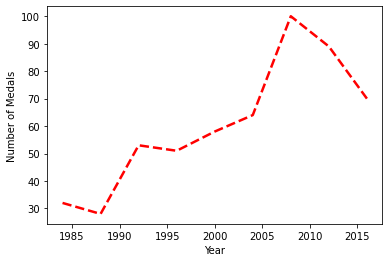

In [90]:
plt.plot(xpoints,ypoints,linestyle='dashed',color='r',linewidth='2.5')
plt.xlabel("Year")
plt.ylabel("Number of Medals")
plt.show()

In [96]:
countries=list(df['region'].dropna().unique())

In [98]:
len(countries)

205

In [102]:
import plotly